In [ ]:
# Read the Package
# Read the Data
# Divide into Catgorical and numerical column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [3]:
data_types=telecom_df.dtypes
dict(data_types)
cat_list=[i for i,j in dict(data_types).items() if j == 'object']
cat_list


['phone_no', 'gender', 'multi_screen', 'mail_subscribed']

In [4]:
num_list=[i for i,j in dict(data_types).items() if j != 'object']
num_list

['year',
 'customer_id',
 'age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched',
 'maximum_days_inactive',
 'customer_support_calls',
 'churn']

In [8]:
cat_columns=telecom_df.select_dtypes(include='object').values
cat_columns

array([['409-8743', 'Female', 'no', 'no'],
       ['340-5930', 'Female', 'no', 'no'],
       ['372-3750', 'Female', 'no', 'no'],
       ...,
       ['353-2080', nan, 'no', 'no'],
       ['359-7788', 'Male', 'no', 'no'],
       ['414-1496', 'Male', 'no', 'no']], dtype=object)

In [6]:
num_columns=telecom_df.select_dtypes(exclude='object').values
num_columns

array([[2.01500e+03, 1.00198e+05, 3.60000e+01, ..., 4.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01500e+03, 1.00643e+05, 3.90000e+01, ..., 3.00000e+00,
        2.00000e+00, 0.00000e+00],
       [2.01500e+03, 1.00756e+05, 6.50000e+01, ..., 4.00000e+00,
        5.00000e+00, 1.00000e+00],
       ...,
       [2.01500e+03, 9.98474e+05, 5.30000e+01, ..., 5.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01500e+03, 9.98934e+05, 4.00000e+01, ...,         nan,
        3.00000e+00, 0.00000e+00],
       [2.01500e+03, 9.99961e+05, 3.70000e+01, ..., 3.00000e+00,
        1.00000e+00, 1.00000e+00]])

**How to select specific columns**

**4 ways**

- Series type

- Dataframe type

In [7]:
# 1
telecom_df['mail_subscribed'] #seris type

0        no
1        no
2        no
3       yes
4        no
       ... 
1995    yes
1996     no
1997     no
1998     no
1999     no
Name: mail_subscribed, Length: 2000, dtype: object

In [5]:
# 2
telecom_df[['mail_subscribed']]

,mail_subscribed
0,no
1,no
2,no
3,yes
4,no
...,...
1995,yes
1996,no
1997,no
1998,no


In [9]:
# 3
telecom_df.loc[:,['mail_subscribed']]

,mail_subscribed
0,no
1,no
2,no
3,yes
4,no
...,...
1995,yes
1996,no
1997,no
1998,no


In [12]:
#4
telecom_df.mail_subscribed

0        no
1        no
2        no
3       yes
4        no
       ... 
1995    yes
1996     no
1997     no
1998     no
1999     no
Name: mail_subscribed, Length: 2000, dtype: object

**Read Multiple Columns**

In [10]:
cols=['gender', 'multi_screen']
telecom_df[cols]

,gender,multi_screen
0,Female,no
1,Female,no
2,Female,no
3,Female,no
4,Female,no
...,...,...
1995,Female,no
1996,Male,no
1997,NaN,no
1998,Male,no


**Task-1**

- How many applicant of Mail_Subscibe'

    **Unique**

- How many unique items are there in particular column

In [36]:
telecom_df['mail_subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
len(telecom_df['mail_subscribed'].unique())

2

**Nunique**

- count of unique items

In [14]:
telecom_df['mail_subscribed'].nunique()

2

In [15]:
telecom_df['mail_subscribed'] =='yes'

0       False
1       False
2       False
3        True
4       False
        ...  
1995     True
1996    False
1997    False
1998    False
1999    False
Name: mail_subscribed, Length: 2000, dtype: bool

In [18]:
con=telecom_df['mail_subscribed'] =='yes'
telecom_df[con]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
10,2015,103697,411-9554,Male,34,114,no,yes,338.70,8.4,38.39,100,9,3.0,4,0.0
15,2015,106415,364-2166,Male,30,100,no,yes,328.05,12.1,37.18,117,4,4.0,1,0.0
24,2015,108810,399-9802,Female,36,81,no,yes,251.85,9.2,28.54,103,6,3.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2015,992456,392-3813,Male,25,144,no,yes,159.60,10.1,18.09,111,5,3.0,1,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN


In [19]:
len(telecom_df[con])

570

In [20]:
len(telecom_df[telecom_df['mail_subscribed'] =='yes'])

570

In [21]:
telecom_df[telecom_df['mail_subscribed'] =='no']

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [22]:
len(telecom_df[telecom_df['mail_subscribed'] =='no'])

1430

In [23]:
for i in telecom_df['mail_subscribed'].unique():
    print(i)

no
yes


In [48]:
for i in telecom_df['mail_subscribed'].unique():
    print(telecom_df['mail_subscribed'] =='no')

0        True
1        True
2        True
3       False
4        True
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Name: mail_subscribed, Length: 2000, dtype: bool
0        True
1        True
2        True
3       False
4        True
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Name: mail_subscribed, Length: 2000, dtype: bool


In [49]:
for i in telecom_df['mail_subscribed'].unique():
    print(telecom_df['mail_subscribed'] =='yes')

0       False
1       False
2       False
3        True
4       False
        ...  
1995     True
1996    False
1997    False
1998    False
1999    False
Name: mail_subscribed, Length: 2000, dtype: bool
0       False
1       False
2       False
3        True
4       False
        ...  
1995     True
1996    False
1997    False
1998    False
1999    False
Name: mail_subscribed, Length: 2000, dtype: bool


In [24]:
for i in telecom_df['mail_subscribed'].unique():
    con=telecom_df['mail_subscribed'] =='yes' 
    con1=telecom_df['mail_subscribed'] =='no'
   
    count=len(telecom_df[con])
    count1=len(telecom_df[con1])
    print(f"The number of applicant who subscribe mail {i} is:{count}")
    print(f"The number of applicant who have not subscribe mail {i} is:{count1}")

The number of applicant who subscribe mail no is:570
The number of applicant who have not subscribe mail no is:1430
The number of applicant who subscribe mail yes is:570
The number of applicant who have not subscribe mail yes is:1430


In [25]:
for i in telecom_df['mail_subscribed'].unique():
    count = len(telecom_df[telecom_df['mail_subscribed'] == i])
    print(f"The number of applicants who have '{i}' as their mail subscription status is: {count}")


The number of applicants who have 'no' as their mail subscription status is: 1430
The number of applicants who have 'yes' as their mail subscription status is: 570


**Value Counts**

In [11]:
telecom_df['mail_subscribed'].value_counts()

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

In [12]:
cdf=telecom_df['mail_subscribed'].value_counts()
cdf

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

In [63]:
dir(cdf)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [14]:
cdf.keys()

Index(['no', 'yes'], dtype='object', name='mail_subscribed')

In [13]:
v=cdf.values
v

array([1430,  570], dtype=int64)

**Normalize**

- Relative frequency table

- will give percentage of kablaes in columns


In [32]:
cdf=telecom_df['weekly_mins_watched'].value_counts(normalize = True)
round(cdf*100,2)

weekly_mins_watched
231.00    0.35
213.45    0.30
235.65    0.30
251.70    0.25
290.70    0.25
          ... 
179.55    0.05
414.90    0.05
236.55    0.05
181.05    0.05
178.05    0.05
Name: proportion, Length: 1260, dtype: float64

**Bar Charts**

- Barchart is graaphical representation of frequency table

- Bar praf is a plot between count and class

- in order to plot bar chart we require two column - Categorical column and numerical column

In [11]:
telecom_df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

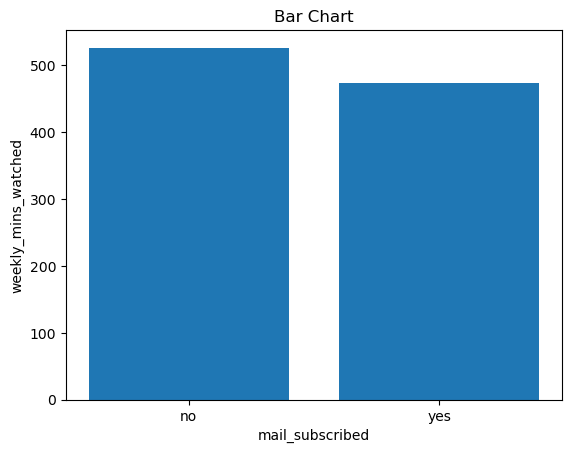

In [15]:
plt.bar('mail_subscribed',   #Categorical Column x-axis
        'weekly_mins_watched', #numerical Column   y-axis
        data=telecom_df)   
plt.title('Bar Chart')
plt.xlabel('mail_subscribed')
plt.ylabel('weekly_mins_watched')
plt.savefig('Mail_barchart1.png')
plt.show()

Subplots

Plots multiple graphs

suppose 2*2 matrix and 4 plots are there

then 1st possition - (2,2,1)

2nd (2,2,2)

3rd (2,2,3)

4rth (2,2,4)

<Axes: >

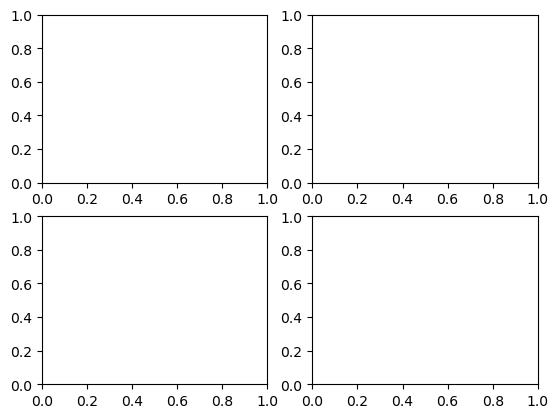

In [16]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

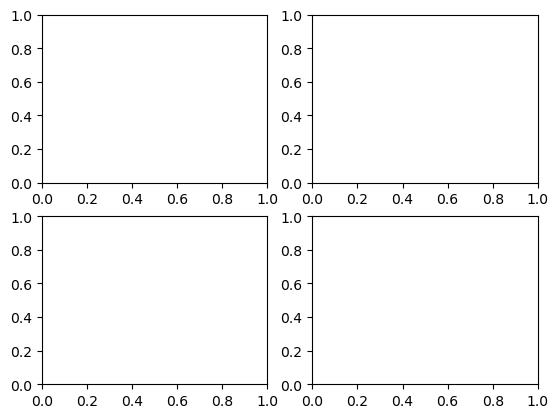

In [15]:
for i in range(1,5):
    plt.subplot(2,2,i)

<Axes: xlabel='weekly_mins_watched', ylabel='count'>

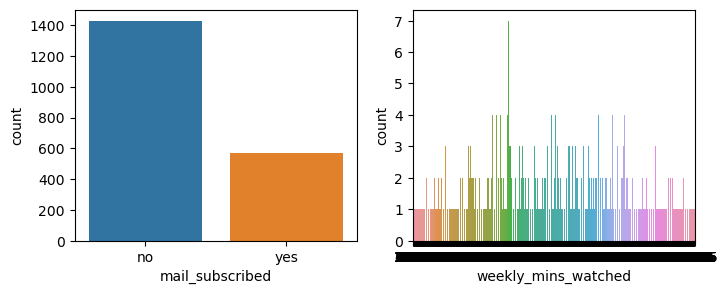

In [20]:

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.countplot(x='mail_subscribed', data=telecom_df)
plt.subplot(1,2,2)
sns.countplot(x='weekly_mins_watched', data=telecom_df)

Text(0.5, 1.0, 'maximum_daily_mins_chart')

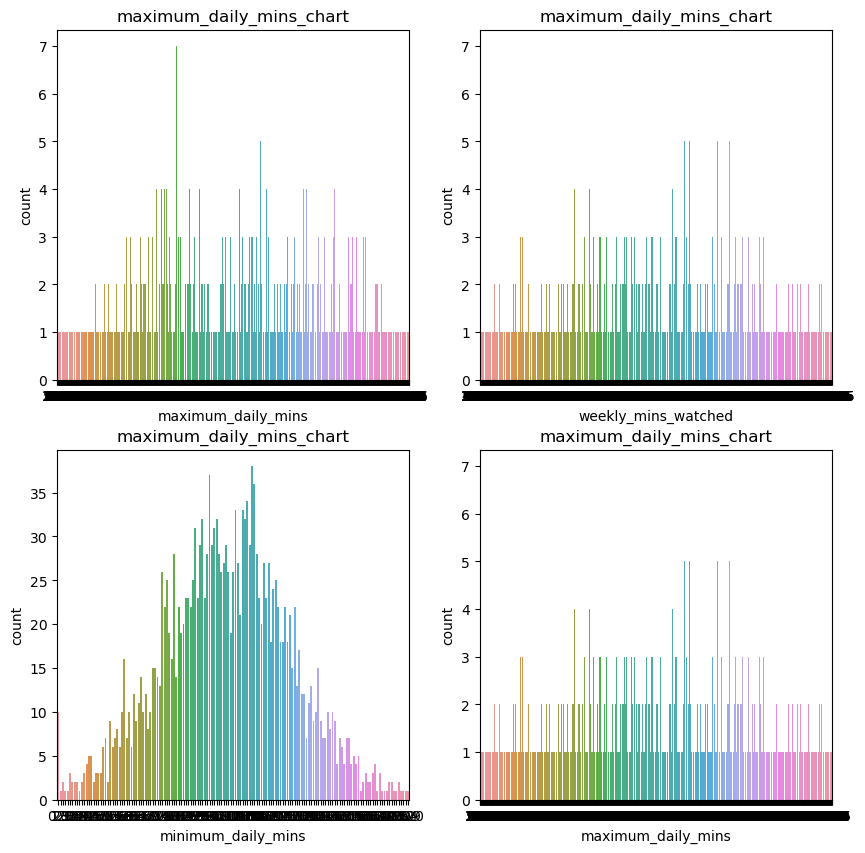

In [28]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x='maximum_daily_mins', data=telecom_df)
plt.title('maximum_daily_mins_chart')

plt.subplot(2,2,2)
sns.countplot(x='weekly_mins_watched', data=telecom_df)
plt.title('maximum_daily_mins_chart')

plt.subplot(2,2,3)
sns.countplot(x='minimum_daily_mins', data=telecom_df)
plt.title('maximum_daily_mins_chart')

plt.subplot(2,2,4)
sns.countplot(x='maximum_daily_mins', data=telecom_df)
plt.title('maximum_daily_mins_chart')

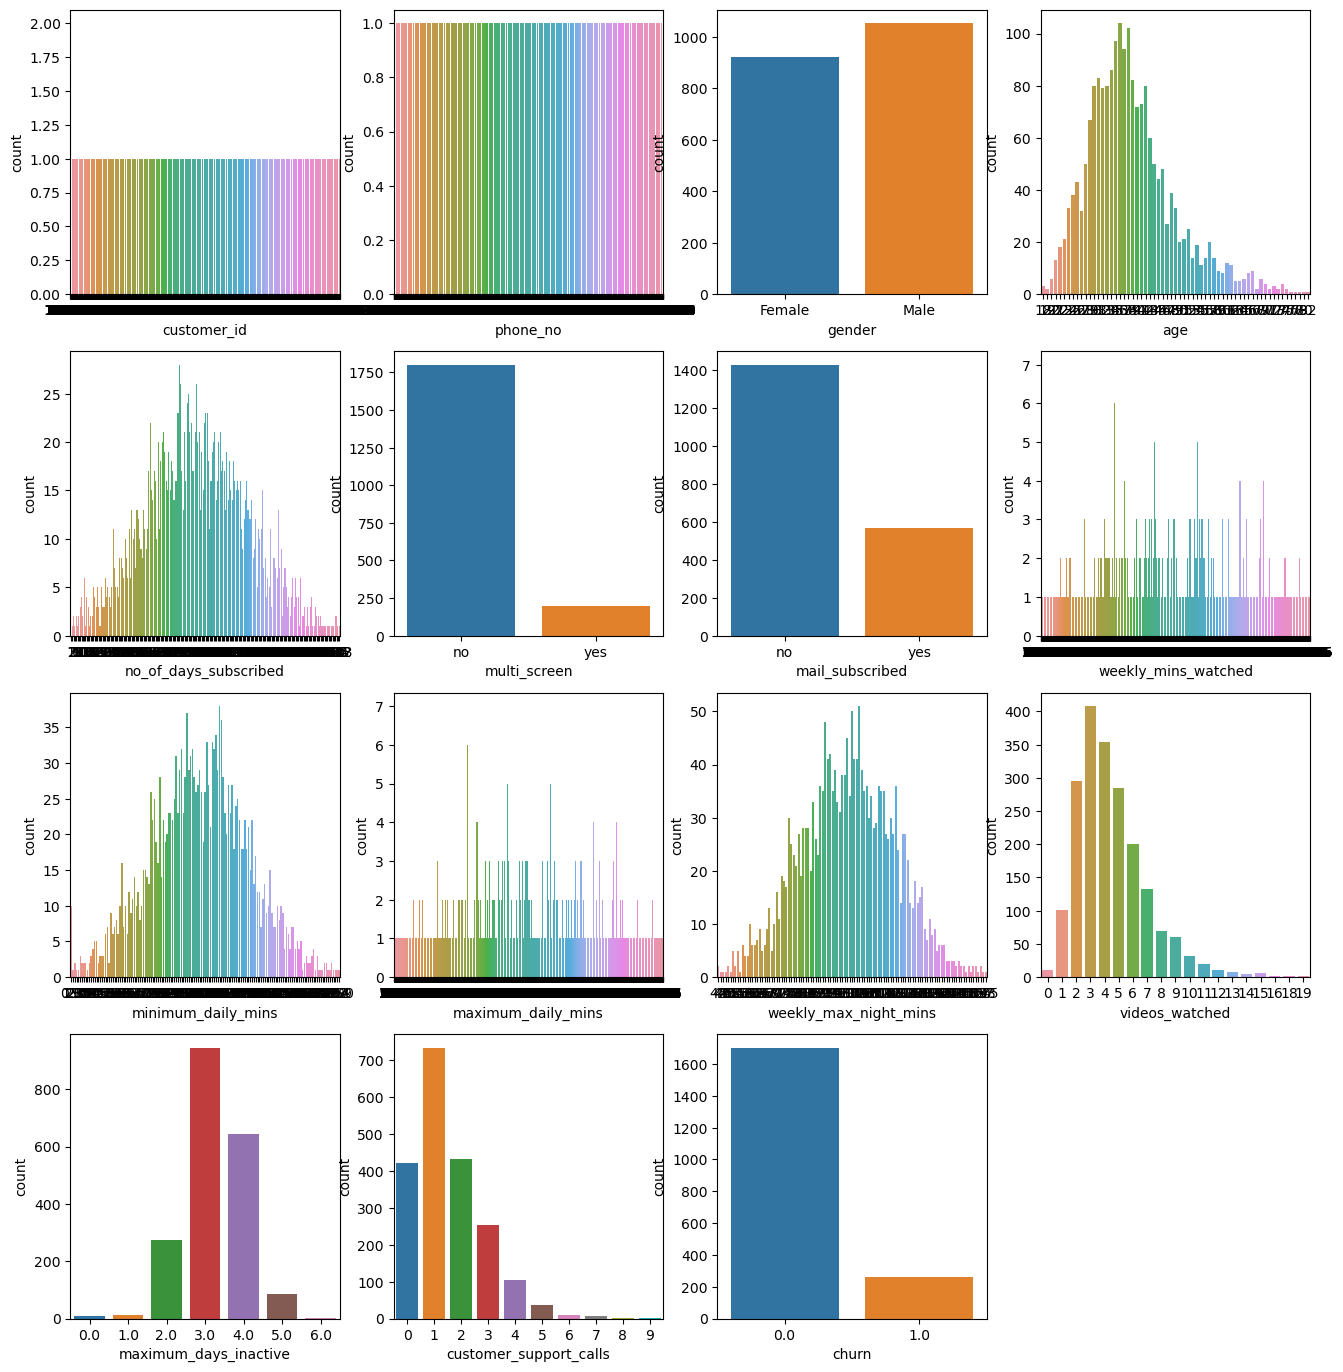

In [34]:
cols=telecom_df.columns[1:]
plt.figure(figsize=(16,17))
for i in range (len(cols)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=cols[i], data=telecom_df)


**Method - 3**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [11]:
data_types=telecom_df.dtypes
dict(data_types)
cat_list=[i for i,j in dict(data_types).items() if j == 'object']
cat_list

['phone_no', 'gender', 'multi_screen', 'mail_subscribed']

In [10]:
num_list=[i for i,j in dict(data_types).items() if j != 'object']
num_list

['year',
 'customer_id',
 'age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched',
 'maximum_days_inactive',
 'customer_support_calls',
 'churn']

In [12]:
cdf=telecom_df['mail_subscribed'].value_counts()
cdf

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

[Text(0, 0, '1430'), Text(0, 0, '570')]

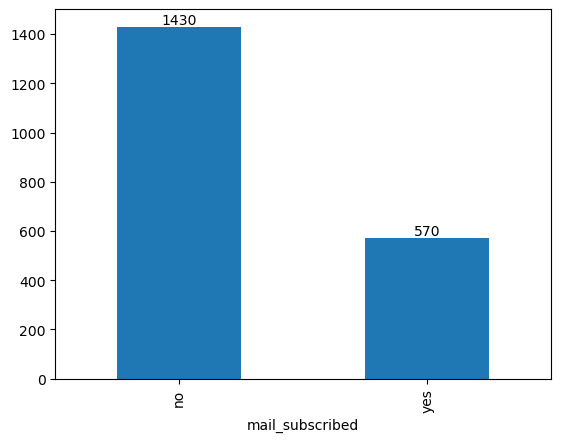

In [19]:
ax=cdf.plot(kind='bar')
ax.bar_label(ax.containers[0])
#plt.show()

**Pie Chart**

- pie chart is a 360 degrees view

- under matplotlib package

- it will takes keys and values that we grt from value counts

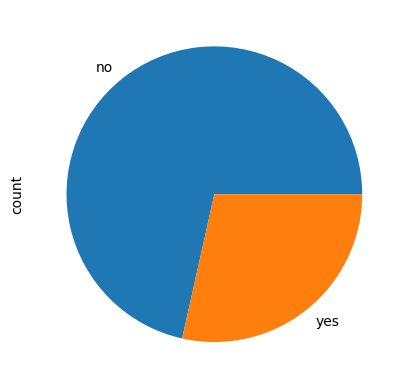

In [20]:
ax=cdf.plot(kind='pie')
#ax.bar_label(ax.containers[0])

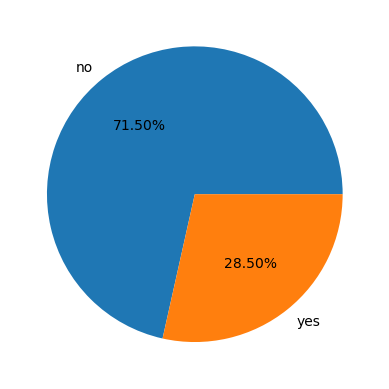

In [33]:
keys=telecom_df['mail_subscribed'].value_counts().keys()
values=telecom_df['mail_subscribed'].value_counts().values
plt.pie(values,labels=keys,autopct='%0.2f%%')
plt.show()

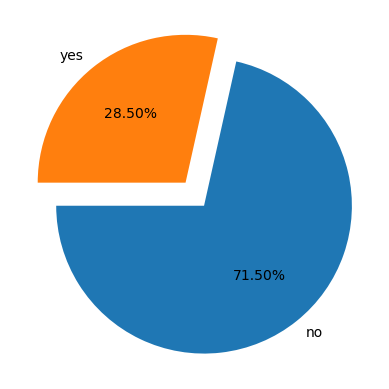

In [36]:
keys=telecom_df['mail_subscribed'].value_counts().keys()
values=telecom_df['mail_subscribed'].value_counts().values
plt.pie(values, explode=[0.1,0.1],labels=keys,autopct='%0.2f%%',radius=1, startangle=180)
plt.show()